In [ ]:
from fastai.data.transforms import get_image_files
znaki_files = get_image_files('/content/drive/MyDrive/datasety/znaki_bazowe')
znaki_files[0].name

'D-1_3.jpg'

In [ ]:
import re
labels_pattern = r'([A-Z]-\d+[a-z]?)_(\d+).\w+'
rgxp = re.compile(labels_pattern)
rgxp.match(znaki_files[0].name)

<re.Match object; span=(0, 9), match='D-1_3.jpg'>

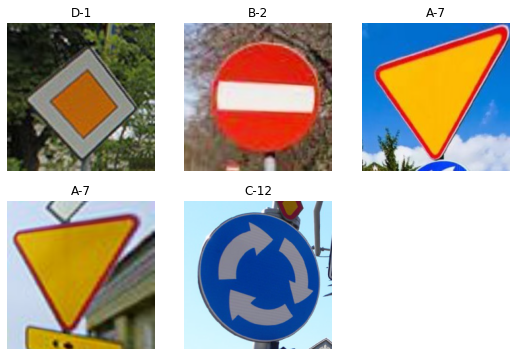

In [ ]:
from fastai.vision.data import ImageDataLoaders
from fastai.vision.augment import Resize
from fastai.vision.augment import aug_transforms
learner_output_dir = '/content/drive/MyDrive/learner_output'
dls = ImageDataLoaders.from_name_re(learner_output_dir, znaki_files, labels_pattern, item_tfms=Resize(460),
batch_tfms=aug_transforms(size=224), bs=5)
dls.show_batch()

In [ ]:
from fastai.vision.all import *
learn = vision_learner(dls, resnet18, metrics=error_rate)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

SuggestedLRs(valley=0.002511886414140463)

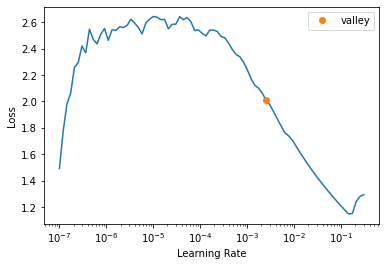

In [ ]:
learn.lr_find()

In [ ]:
learning_rate = 0.002511886414140463
epochs = 4

epoch,train_loss,valid_loss,error_rate,time
0,3.031608,1.458192,0.500000,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.901255,0.638150,0.250000,00:07
1,0.719197,0.077180,0.000000,00:06
2,0.491285,0.021619,0.000000,00:07
3,0.383888,0.022662,0.000000,00:06


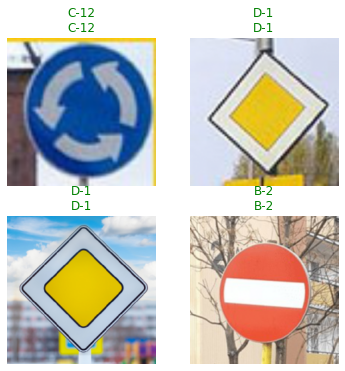

In [ ]:
learn.fine_tune(epochs, learning_rate);
learn.show_results()

In [ ]:
learn.export()

TypeError: ignored

In [ ]:
#import shutil
#shutil.copytree('/kaggle/wokring/learner_output', '/content/drive/MyDrive/learner_output')

'/content/drive/MyDrive/learner_output'

In [ ]:
from fastai.vision.widgets import *
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
url_input = widgets.Text(
    placeholder='URL do grafiki',
    description='String:',
    disabled=False
)
url_input

Text(value='', description='String:', placeholder='URL do grafiki')

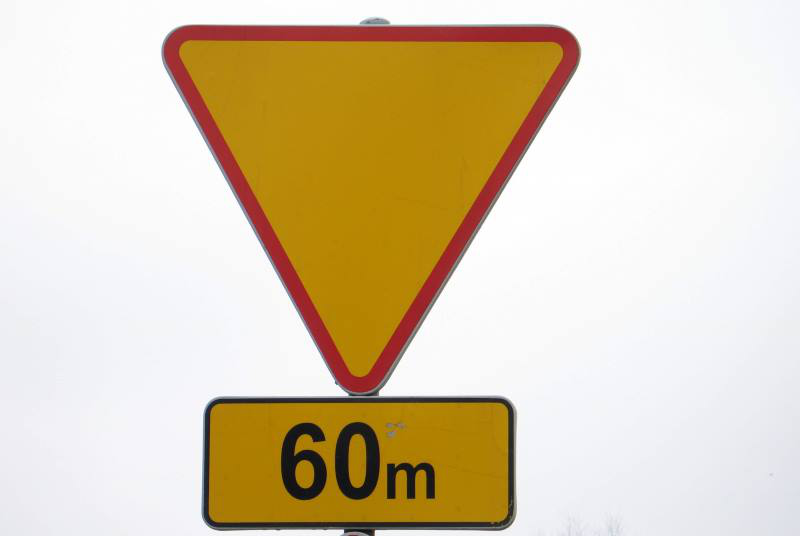

In [ ]:
import requests
from io import BytesIO
from PIL import Image
response = requests.get(url_input.value)
img = PILImage.create(response.content)
img

In [ ]:
img = PILImage.create(btn_upload.data[-1])
img

('B-2', TensorBase(1), TensorBase([0.2488, 0.5293, 0.1023, 0.1196]))

In [ ]:
learn.predict(img)

('A-7', TensorBase(0), TensorBase([0.9244, 0.0186, 0.0043, 0.0527]))